In [225]:
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

In [226]:
#Tutorial Base
#https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html
#https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html
#https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_arma_0.html
#https://medium.com/@gisely.alves/s%C3%A9ries-temporais-parte-1-20fca5a6c7cd

In [227]:
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [228]:
dados = pd.read_csv(r"C:\previsao_precos\Superstore.csv",sep=";")





In [229]:
dados.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [230]:
dados = dados[['Order ID','Order Date','Country','City'
       ,'Category','Sales','Quantity','Discount']]

In [231]:
dados['Order Date'] = pd.to_datetime(dados['Order Date'],errors='coerce')

In [232]:
dados.dropna(subset=['Order Date'],inplace=True)

In [233]:
dados[['Sales','Discount']] = dados[['Sales','Discount']].applymap(lambda k: k.replace(".","").replace(",","."))

In [234]:
dados['Quantity'] = dados['Quantity'].astype(int)

In [235]:
dados[['Sales','Discount']] = dados[['Sales','Discount']].astype(float).round(2)

In [236]:
dados['unitario']= dados['Sales']/dados['Quantity']

In [237]:
dados['unitario'] = dados['unitario'].astype(float).round(2)

In [238]:
data = dados[['Sales','Discount','Category','Country','City','Quantity','Order Date','unitario']]

In [239]:

data.set_index("Order Date", inplace=True)
#dta = dados[columns]
data.head(2)


,Sales,Discount,Category,Country,City,Quantity,unitario
Order Date,,,,,,,
2016-08-11,261.96,0.0,Furniture,United States,Henderson,2,130.98
2016-08-11,731.94,0.0,Furniture,United States,Henderson,3,243.98


In [240]:
data.columns

Index(['Sales', 'Discount', 'Category', 'Country', 'City', 'Quantity',
       'unitario'],
      dtype='object')

In [241]:
data

,Sales,Discount,Category,Country,City,Quantity,unitario
Order Date,,,,,,,
2016-08-11,261.96,0.00,Furniture,United States,Henderson,2,130.98
2016-08-11,731.94,0.00,Furniture,United States,Henderson,3,243.98
2016-12-06,14.62,0.00,Office Supplies,United States,Los Angeles,2,7.31
2015-11-10,957.58,0.45,Furniture,United States,Fort Lauderdale,5,191.52
2015-11-10,22.37,0.20,Office Supplies,United States,Fort Lauderdale,2,11.18
...,...,...,...,...,...,...,...
2016-06-12,13.38,0.20,Office Supplies,United States,Los Angeles,4,3.34
2016-06-12,437.47,0.20,Office Supplies,United States,Los Angeles,14,31.25
2015-06-09,85.98,0.00,Furniture,United States,Lafayette,1,85.98


In [242]:
precos = data[['unitario','Quantity']]

In [243]:
precos

,unitario,Quantity
Order Date,,
2016-08-11,130.98,2
2016-08-11,243.98,3
2016-12-06,7.31,2
2015-11-10,191.52,5
2015-11-10,11.18,2
...,...,...
2016-06-12,3.34,4
2016-06-12,31.25,14
2015-06-09,85.98,1


<Axes: xlabel='Order Date'>

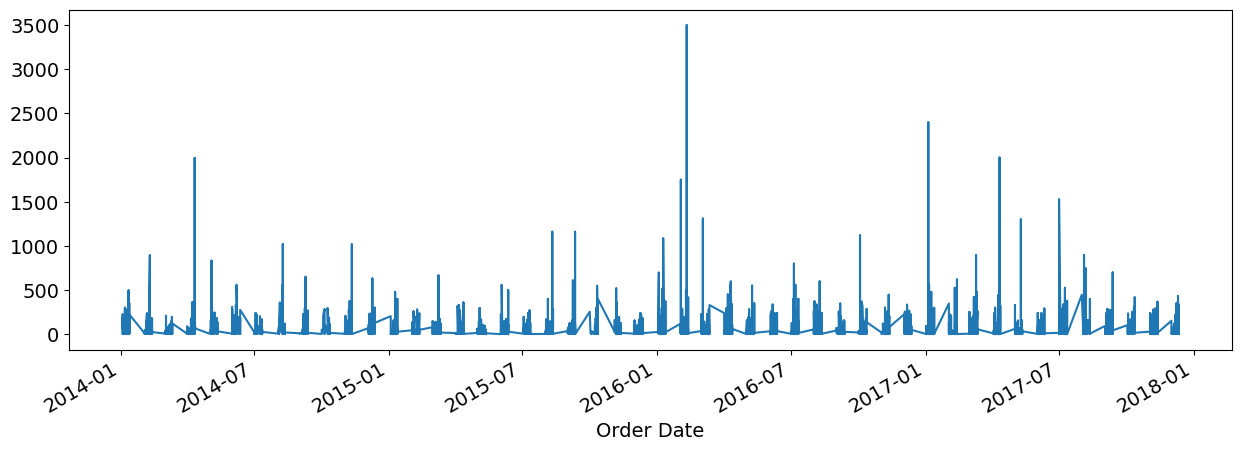

In [244]:

endog = precos['unitario']
endog.plot(figsize=(15, 5))

In [245]:
y = precos['unitario']
x = precos['Quantity']
x = sm.add_constant(x)

In [246]:
olsmod = sm.OLS(y, x)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:               unitario   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8120
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.368
Time:                        13:51:56   Log-Likelihood:                -25556.
No. Observations:                4042   AIC:                         5.112e+04
Df Residuals:                    4040   BIC:                         5.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.6699      4.212     14.878      0.0

In [247]:
ypred = olsres.predict(x)
precos['previsao'] = ypred

In [248]:
precos

,unitario,Quantity,previsao
Order Date,,,
2016-08-11,130.98,2,60.929833
2016-08-11,243.98,3,60.059779
2016-12-06,7.31,2,60.929833
2015-11-10,191.52,5,58.319671
2015-11-10,11.18,2,60.929833
...,...,...,...
2016-06-12,3.34,4,59.189725
2016-06-12,31.25,14,50.489184
2015-06-09,85.98,1,61.799888


<Axes: xlabel='Order Date'>

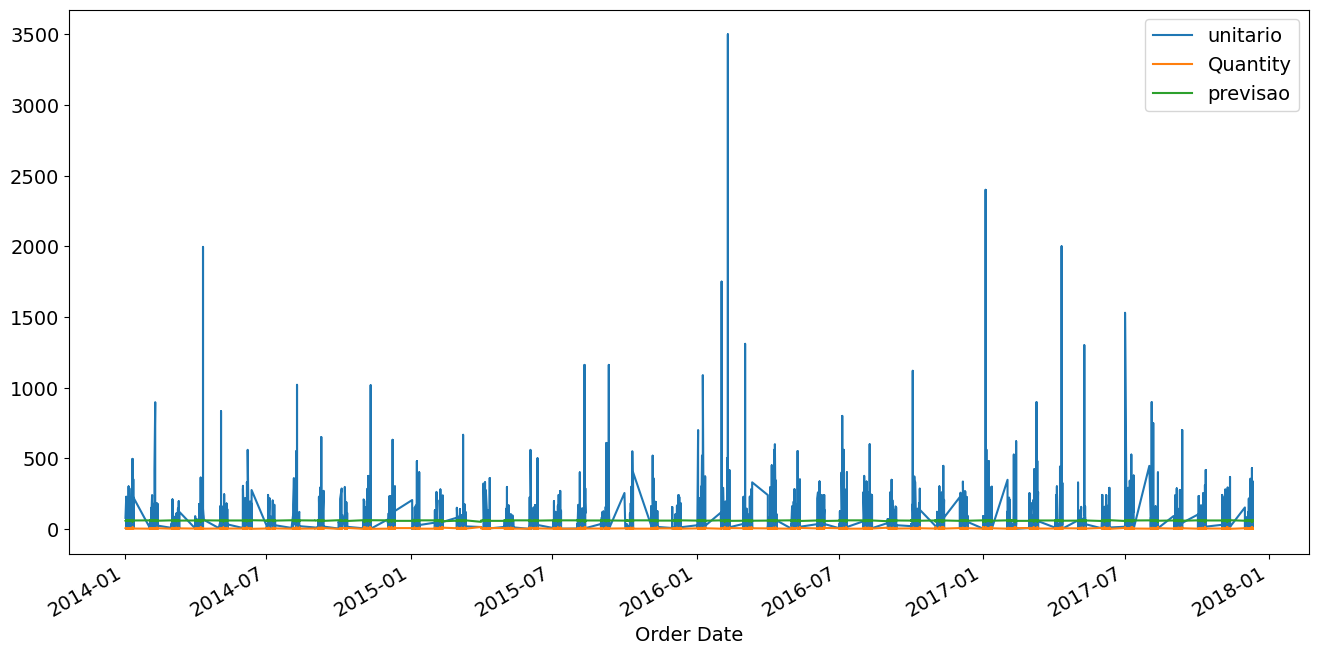

In [249]:
precos.plot()

In [250]:
mod = sm.tsa.SARIMAX(endog)
res = mod.fit()

print(res.summary())


                               SARIMAX Results                                
Dep. Variable:               unitario   No. Observations:                 4042
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -25860.640
Date:                Wed, 26 Apr 2023   AIC                          51725.280
Time:                        13:51:56   BIC                          51737.889
Sample:                             0   HQIC                         51729.747
                               - 4042                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1629      0.012     13.351      0.000       0.139       0.187
sigma2      2.112e+04     57.076    370.088      0.000     2.1e+04    2.12e+04
Ljung-Box (L1) (Q):                 100.47   Jarque-